# Visual story telling part 2: Capital Metro data

### Anisha Singh (as229583), Antra Sinha (as224589), Hayoung Kim (hk26786), Meenakshi Sundaram (ms88544)


The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

timestamp: the beginning of the 15-minute window for that row of data
boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
temperature: temperature at that time in degrees F
hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
month: July through December
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\Asus\Downloads\capmetro_UT.csv")

### 1.Plot of Average Ridership based on Weekday and Weekend
### 2.Plot of Average Ridership based on Monthly Ridership Pattern



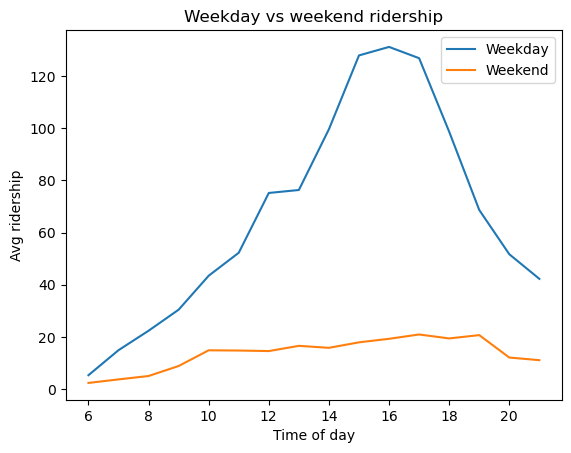

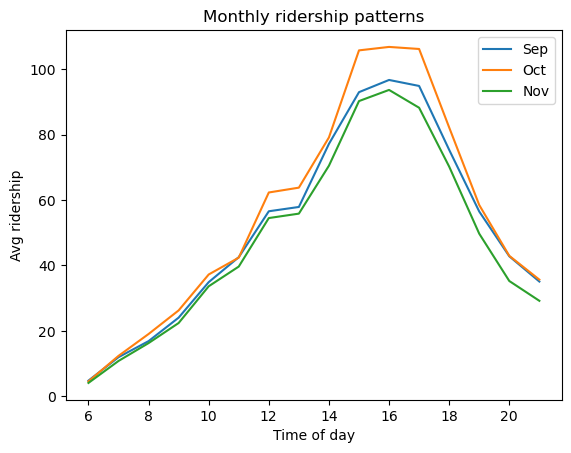

In [3]:



# Figure 1 
weekday = data[(data['day_of_week'] != 'Sat') & (data['day_of_week'] != 'Sun')] 
weekend = data[(data['day_of_week'] == 'Sat') | (data['day_of_week'] == 'Sun')]

plt.figure()
plt.plot(weekday.groupby('hour_of_day').boarding.mean(), label='Weekday')
plt.plot(weekend.groupby('hour_of_day').boarding.mean(), label='Weekend')
plt.xlabel('Time of day')
plt.ylabel('Avg ridership')
plt.title('Weekday vs weekend ridership')
plt.legend()

# Figure 2
months = ['Sep', 'Oct', 'Nov']
plt.figure()
for month in months:
    subset = data[data['month'] == month]
    plt.plot(subset.groupby('hour_of_day').boarding.mean(), label=month)
plt.xlabel('Time of day')
plt.ylabel('Avg ridership') 
plt.title('Monthly ridership patterns')
plt.legend()

plt.show()


 Weekend ridership is generally much lower than Weekday.

Ridership patterns follow typical office working schedules.Weekday ridership peaks till 4pm(highest) with very low ridership in the late evenings after 9-10pm. 


 The month of October has the highest average ridership than any other month

### 3.Plot of Average Ridership based on day of the week

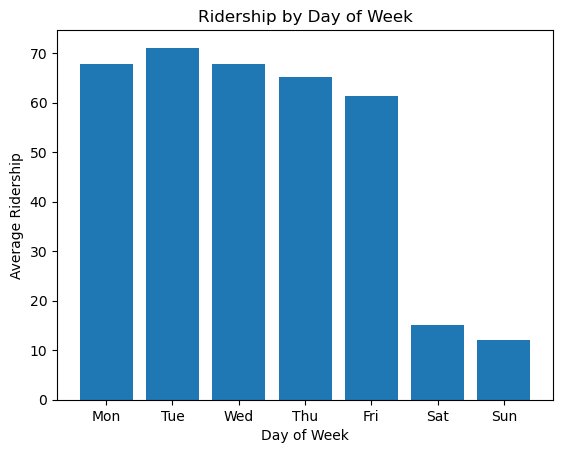

In [7]:

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

days = data.groupby('day_of_week').boarding.mean().reset_index()
days = days.set_index('day_of_week')
days = days.loc[day_order]

plt.bar(days.index, days.boarding)
plt.xticks(days.index, days.index) 
plt.xlabel('Day of Week')
plt.ylabel('Average Ridership')
plt.title('Ridership by Day of Week')
plt.show()

Ridership differs by day of the week, with Tuesdays being busiest, followed by Wednesday and Monday.Saturday and Sunday is the lowest

### 4.Plot of Average Ridership based on day of the week for each month

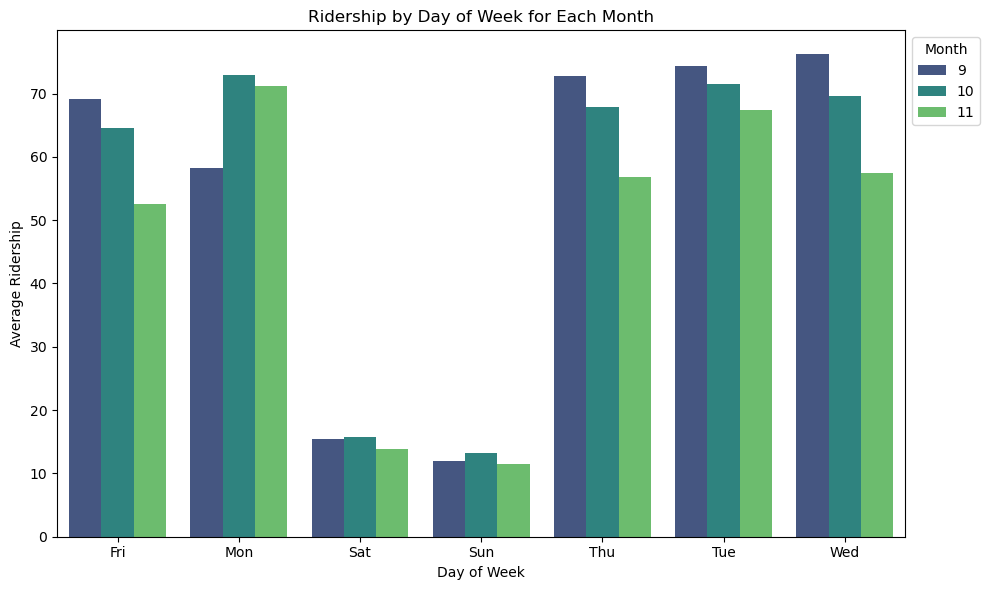

In [9]:

data['timestamp'] = pd.to_datetime(data['timestamp'])

data['day_of_week'] = data['timestamp'].dt.dayofweek

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data['day_of_week'] = data['day_of_week'].map(lambda x: day_order[x])

data['month'] = data['timestamp'].dt.month

average_ridership_by_month_and_day = data.groupby(['month', 'day_of_week'])['boarding'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_ridership_by_month_and_day, x='day_of_week', y='boarding', hue='month', palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Average Ridership')
plt.title('Ridership by Day of Week for Each Month')
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


This shows that for the month of September(Wednesday day of the week had the highest ridership),October(Monday day of the week had the highest ridership),November(Monday day of the week had the highest ridership)
However overall Tuesday day of the week had the highest average ridership.But here also Saturday and Sunday average ridership is the lowest.

### 5.Plot of Average Ridership based on Temperature on Weekdays and Weekends

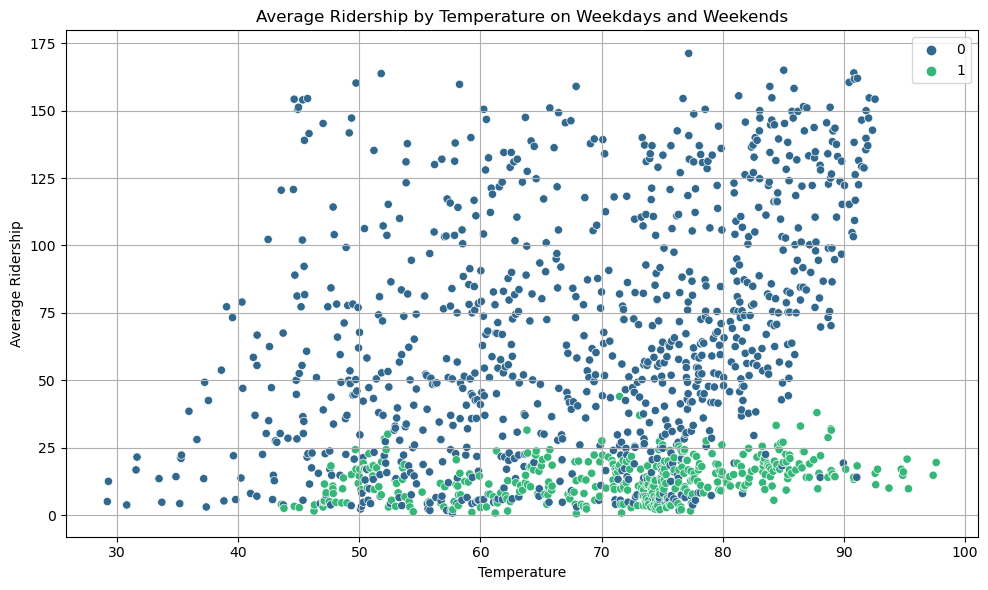

In [11]:

data['timestamp'] = pd.to_datetime(data['timestamp'])

data['day_of_week'] = data['timestamp'].dt.dayofweek

data['weekend'] = data['day_of_week'].map(lambda x: 1 if x >= 5 else 0)

average_ridership_by_temperature = data.groupby(['temperature', 'weekend'])['boarding'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=average_ridership_by_temperature, x='temperature', y='boarding', hue='weekend', palette='viridis')
plt.xlabel('Temperature')
plt.ylabel('Average Ridership')
plt.title('Average Ridership by Temperature on Weekdays and Weekends')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Green scatter plots represents weekend and blue the weekdays
Temperature and ridership seem correlated, with higher temperatures generally corresponding to higher ridership. Cooler mornings see very low ridership.

### 6.Plot of Average Ridership by Temperature based on Months

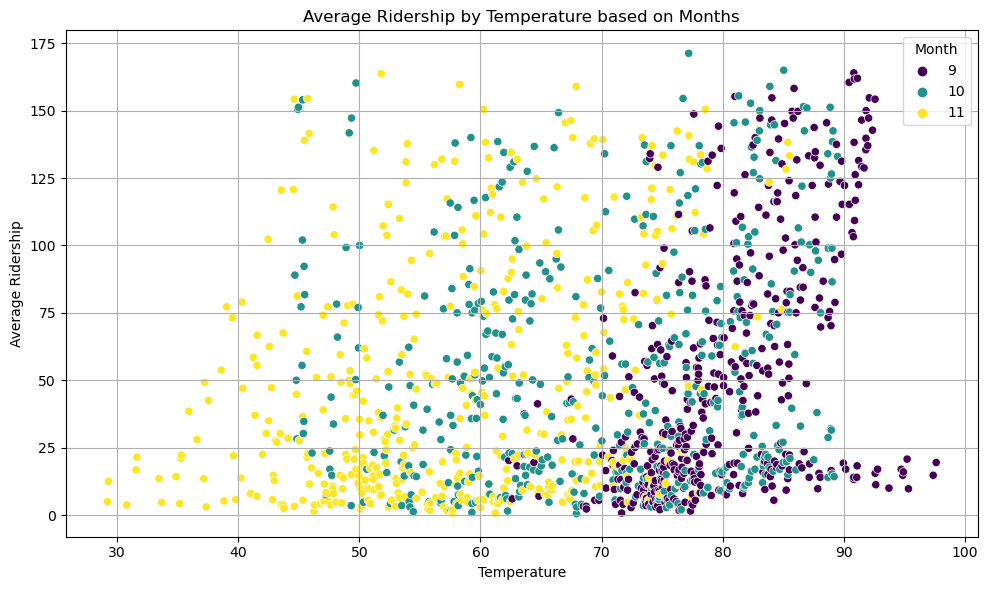

In [13]:

data['timestamp'] = pd.to_datetime(data['timestamp'])

data['month'] = data['timestamp'].dt.month

average_ridership_by_temperature_month = data.groupby(['temperature', 'month'])['boarding'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=average_ridership_by_temperature_month, x='temperature', y='boarding', hue='month', palette='viridis')
plt.xlabel('Temperature')
plt.ylabel('Average Ridership')
plt.title('Average Ridership by Temperature based on Months')
plt.legend(title='Month')

plt.grid(True)
plt.tight_layout()
plt.show()


September has moderate temperatures and therefore fairly consistent ridership during the sample period. More variance would be expected in winter months.
